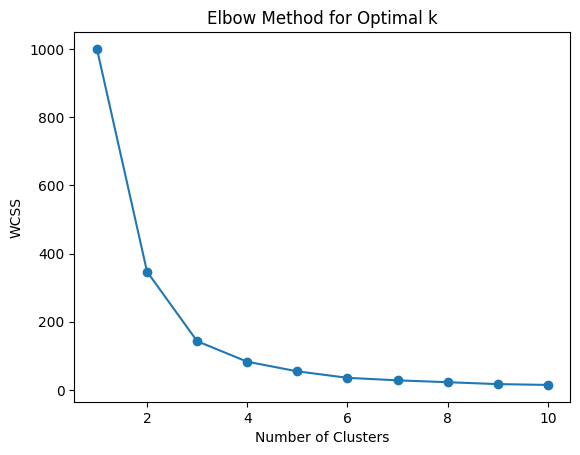

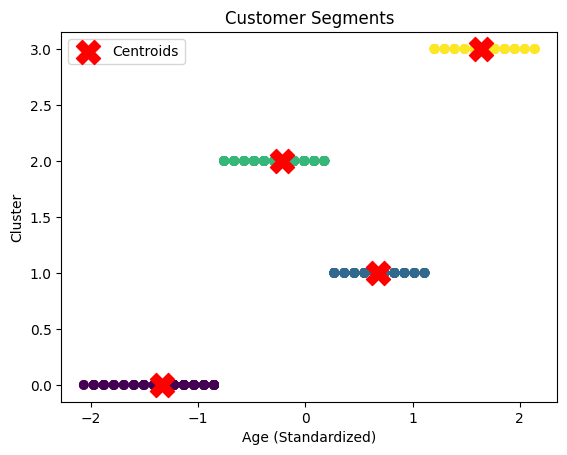

Clustering complete. Results saved to clustered_customers.csv.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming a CSV file with columns: 'CustomerID', 'Age', 'AnnualIncome', 'SpendingScore')
df = pd.read_csv("/content/car_data.zip")

# Selecting relevant features for clustering
features = df[['Age']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-means clustering with optimal k (assume k=4 based on the elbow method)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing clusters
plt.scatter(features_scaled[:, 0], df['Cluster'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], range(len(kmeans.cluster_centers_)), s=300, c='red', marker='X', label='Centroids') # Adjusted for single feature
plt.xlabel('Age (Standardized)')
plt.ylabel('Cluster') # Updated y-axis label
plt.title('Customer Segments')
plt.legend()
plt.show()

# Save the clustered dataset
df.to_csv("clustered_customers.csv", index=False)

print("Clustering complete. Results saved to clustered_customers.csv.")